# 생물정보학 및 실습 1 - Term Project용 환경 셋업

```
생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2021년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

In [2]:
!pwd

/qbio/yoojung/coursework/2021-1/bioinfo1/bioinfo-term-project/notebooks


## 시퀀싱 데이터 다운로드

In [3]:
!wget -O ../ --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C ../ -xf -

../: Is a directory
tar: This does not look like a tar archive
tar: Exiting with failure status due to previous errors


받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [4]:
!md5sum ../binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  ../binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  ../binfo1-datapack1/CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  ../binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  ../binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  ../binfo1-datapack1/RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  ../binfo1-datapack1/RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  ../binfo1-datapack1/RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  ../binfo1-datapack1/RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  ../binfo1-datapack1/RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  ../binfo1-datapack1/RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  ../binfo1-datapack1/RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  ../binfo1-datapack1/RPF-siLuc.bam.bai


그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [ ]:
!wget --no-check-certificate -O ../binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

다루기 쉽도록 Annotation 압축을 풉니다.

In [5]:
!gunzip ../binfo1-datapack1/gencode.gtf.gz

In [7]:
!ls ../binfo1-datapack1/

CLIP-35L33G.bam      RNA-siLin28a.bam	   RPF-siLin28a.bam.bai
CLIP-35L33G.bam.bai  RNA-siLin28a.bam.bai  RPF-siLuc.bam
gencode.gtf	     RNA-siLuc.bam	   RPF-siLuc.bam.bai
RNA-control.bam      RNA-siLuc.bam.bai
RNA-control.bam.bai  RPF-siLin28a.bam


실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [ ]:
!conda install -y subread

## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다. 데이터가 있는 곳으로 이동해서 작업합시다.

In [148]:
%cd ../binfo1-datapack1/

/qbio/yoojung/coursework/2021-1/bioinfo1/bioinfo-term-project/binfo1-datapack1


In [9]:
!featureCounts -a gencode.gtf -o ../read-counts.txt *.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           o CLIP-35L33G.bam                                ||
||                           o RNA-control.bam                                ||
||                           o RNA-siLin28a.bam                               ||
||                           o RNA-siLuc.bam                     

결과를 pandas로 읽어와 봅니다.

In [91]:
import pandas as pd
cnts = pd.read_csv('data/read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


이제 한 번 대충 그림을 그려 봅니다.

In [100]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


In [101]:
cnts.shape

(55359, 13)

In [112]:
# set cutoff value

cnts_cutoff = cnts[(cnts['RNA-control.bam'] > 300) & (cnts['RNA-siLin28a.bam'] > 300) & (cnts['RNA-siLuc.bam'] > 300)]
cnts_cutoff.shape

(3909, 13)

In [103]:
cnts_cutoff.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,1.926316,0.602151
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091
ENSMUSG00000025903.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,3.562718,0.760459
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,609,2.175853,0.562609
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,1128,2.343882,0.437418


0.4693361537523259


Text(0.5, 1.0, 'CLIP and ribosome footprinting upon Lin28a knockdown')

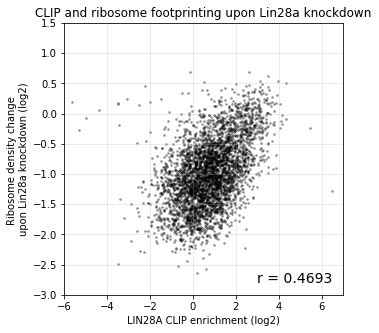

In [147]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

pearsonr = stats.pearsonr(np.log2(cnts_cutoff['clip_enrichment']), np.log2(cnts_cutoff['rden_change']))
print(pearsonr[0])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts_cutoff['clip_enrichment']),
           np.log2(cnts_cutoff['rden_change']),
           c='black',
           s=3,
           alpha=0.3)
# control limitation of x and y axis
ax.set_xlim(-6,7)
ax.set_ylim(-3,1.5)
ax.text(3, -2.8, 'r = {:.4f}'.format(pearsonr[0]), fontsize=14)
ax.grid(alpha=0.3)
ax.set_xlabel('LIN28A CLIP enrichment (log2)')
ax.set_ylabel('Ribosome density change \nupon Lin28a knockdown (log2)')
ax.set_title('CLIP and ribosome footprinting upon Lin28a knockdown')

In [ ]:
# there is a correlation between LIN28A binding and translation

이 그림에는 문제가 많이 있습니다. 논문의 그림처럼 한 번 만들어 봅시다~

## Protein localization 반영하기

논문 그림에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [35]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [126]:
cnts_cutoff2 = cnts[(cnts['RNA-control.bam'] > 100) & (cnts['RNA-siLin28a.bam'] > 100) & (cnts['RNA-siLuc.bam'] > 100)]
cnts_cutoff2.shape

(7452, 13)

In [127]:
cnts_cutoff2 = cnts_cutoff2.rename_axis('gene_id').reset_index()
cnts_cutoff2['gene_id'] = cnts_cutoff2['gene_id'].str[:-2]
cnts_cutoff2.head()

,gene_id,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
0,ENSMUSG00000033845.,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,2.962362,0.494091
1,ENSMUSG00000025903.,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,3.562718,0.760459
2,ENSMUSG00000033813.,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,609,2.175853,0.562609
3,ENSMUSG00000033793.,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,1128,2.343882,0.437418
4,ENSMUSG00000025907.,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,280,694,903,132,251,5.428571,0.684272


In [128]:
cnts_with_loc = pd.merge(cnts_cutoff2, mouselocal, on='gene_id')
cnts_with_loc.head()

,gene_id,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,Gene names,type
0,ENSMUSG00000042414,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,13183681;13186004;13188987;13192585;13194587;1...,13184711;13186105;13189189;13192855;13194744;1...,-;-;-;-;-;-;-;-,2564,227,157,702,414,121,143,1.445860,0.499014,Prdm14,nucleus
1,ENSMUSG00000073725,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,24717711;24717741;24717820;24718007;24724478;2...,24717897;24717897;24717897;24718115;24724654;2...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,5960,562,102,264,225,801,498,5.509804,1.370824,Lmbrd1,integral membrane
2,ENSMUSG00000045216,chr1;chr1;chr1,36107481;36140771;36142594,36108265;36144061;36145527,+;+;+,5542,1729,651,2272,1151,596,348,2.655914,0.867629,Hs6st1,integral membrane
3,ENSMUSG00000010290,chr1;chr1;chr1;chr1,43137870;43139875;43150158;43152346,43138022;43140041;43150533;43155107,+;+;+;+,3458,1005,326,667,680,149,206,3.082822,0.737398,NaN,nucleus
4,ENSMUSG00000073678,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,54512153;54521011;54525629;54529380;54531188;5...,54520003;54521115;54525816;54529430;54531323;5...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,16611,3097,431,1199,896,972,561,7.185615,1.294769,Pgap1,integral membrane


In [129]:
cnts_nucleus = cnts_with_loc[cnts_with_loc['type'] == 'nucleus']
cnts_integral_membrane = cnts_with_loc[cnts_with_loc['type'] == 'integral membrane']
cnts_cytoplasm = cnts_with_loc[cnts_with_loc['type'] == 'cytoplasm']

print(cnts_nucleus.shape)
print(cnts_integral_membrane.shape)
print(cnts_cytoplasm.shape)

(446, 16)
(207, 16)
(206, 16)


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

Text(0.5, 1.0, 'CLIP and ribosome footprinting upon Lin28a knockdown')

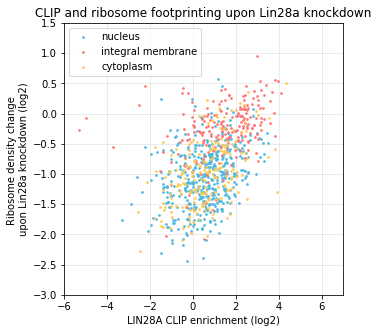

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(np.log2(cnts_nucleus['clip_enrichment']),
           np.log2(cnts_nucleus['rden_change']),
           c='#47b8e0',
           s=3,
           alpha=0.9,
           label='nucleus')

ax.scatter(np.log2(cnts_integral_membrane['clip_enrichment']),
           np.log2(cnts_integral_membrane['rden_change']),
           c='#ff7473',
           s=3,
           alpha=0.9,
           label='integral membrane')

ax.scatter(np.log2(cnts_cytoplasm['clip_enrichment']),
           np.log2(cnts_cytoplasm['rden_change']),
           c='#ffc952',
           s=3,
           alpha=0.9,
           label='cytoplasm')

    
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlim(-6,7)
ax.set_ylim(-3,1.5)
ax.set_xlabel('LIN28A CLIP enrichment (log2)')
ax.set_ylabel('Ribosome density change \nupon Lin28a knockdown (log2)')
ax.set_title('CLIP and ribosome footprinting upon Lin28a knockdown')

In [ ]:
# the translation of integral membrane protein coding genes is mostly affected by Lin28a knockdown